# DRUNK PLINKO

<b>Authors:</b> <br>
Ekin Yelken 20166126 (18edy1@queensu.ca) <br>
Edwin Feng  20166650 (18sf45@queensu.ca) <br>

<b> Objective </b> <br>
    
Model a Pinko drop at varies drag coefficient while study the behavior of the disc and the result of such process. <br>

<b> Notes </b> <br>
This operation is in units of metres and takes 100 data points for the histograms and prints XY Path, X, Y, Vx, Vy vs time graphs of first run <br>
Total Run time start to finish ~27 seconds.

## IMPORT LIBRARIES

In [1]:
import numpy as np
import random 
from matplotlib import pyplot as plt
%matplotlib inline

## Peg Grid

<b> Logistics: </b> <br>
Size of x and y grid are first defined in in two seperate empty arrays. Rows with half and full pegs are defined and put into the proper row 
to make up the grid; the seperation between rows are calculated using trig and applied to the grid <br>

<b> Observations </b> <br>
&nbsp;- starting from the bottom, the first row has only full pegs starting at 0.05 (index = 0), the row followed has pegs on the sides and appear tobe half pegs; these rows alternates till the 10th row (index = 9) <br>
&nbsp;- distance between rows is the height of the equilateral triangle, defined as "heights" and calculated using trig 10cos(pi/6) <br>

In [2]:
np.set_printoptions(suppress=True)
# Set up abnd Graph pegs
def PlinkoGrid(show):
    n = 10
    # create x and y grids
    xgrid = np.zeros([n, n+1])
    ygrid = np.zeros((n, n+1))

    # Array for pegs with half
    fullPeg = np.linspace(0, 1, 11)

    # Array for pegs with wholes
    halfPeg = np.linspace(0.05, 1.05, 11)

    # Different Rows
    for i in range(1, n, 2):  #half pegs reside on row 1, 3, 5, 7, 9
        xgrid[i, :] = halfPeg
    for i in range(0, n, 2):  #all-full-peg rows are row 0, 2, 4, 6, 8
        xgrid[i, :] = fullPeg

    # Y Coordinates
    heights = np.flip(np.arange(0, 80, 10*np.cos(np.pi/6))) # create 1D array of Y heights

    # Apply Y Coordinates to a grid
    for j in range(0, n, 1):
        ygrid[j] = np.ones(11) * heights[j]/100
    
    # Plot pegs
    if(show == 1):
        # Set Up and Label Graph
        plt.title ('Plinko: Irresponsible Young Adult Edition!!')
        plt.xlabel('X Position (m)')
        plt.ylabel('Y Position (m)')
        plt.xticks(np.arange(0, 1, step=0.05))
        plt.yticks(np.arange(0, 1, step=0.05))
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        for i in range (0, n):
            plt.scatter(xgrid[i], ygrid[i], marker = 'o', color = 'b', s = 10)
    
    # Return List of arrays with X and Y Coordinates
    return np.array([xgrid, ygrid])

## Format peg Coordinates

This is to make the physics calulcaitons in plinko easier

In [3]:
# Formate grid for Physics function
def formatGrid(grid):
    # Initialze List of 1x2 Matricies for all pegs
    pegList = np.zeros((105,2))
    n = 0
    # List pegs
    for i in range(10):
        for j in range(10):
            pegList[n] = grid[:,i,j]
            n += 1
    pegList[104] = [1, 0.77942286]
    pegList[103] = [1, 0.60621778]
    pegList[102] = [1, 0.4330127]
    pegList[101] = [1, 0.25980762]
    pegList[100] = [1, 0.08660254]
    # Return fully populated List of coordinate pairs
    return pegList

## Determine final location and prize

The prize is determined by the final X position of the disk which is executed similar to a swtich case function. This code takes the final bin output from the plinko function and spits a String based on integer input from 0 to 10.

In [4]:
# Scuffed switch function in python
def bin(discx):
    switcher = { 
        0: 'your best dance move',
        1: 'tequila suicide',
        2: 'your mating call',
        3: 'body shots off the person to your right',
        4: 'shotgun a brew homie',
        5: 'premarital handholding to person on left if you are comfortable',
        6: 'a dare',
        7: 'mama bird baby bird',
        8: 'a waterfall',
        9: 'a dark liqour shot',
        10: 'finish your drink, loser'
    }
    return switcher.get(discx, 'You messed the code up, take a shot') # return message based on which bin you land in

## Variation in Variables ±0.2cm

This in reality can result from a shakey hand upon releasing the disk, the imperfection in the shape of the disc or pegs or unelastic colluision due to the materials used.

In [5]:
def randomize(value):
    flip = random.randint(0, 20) # Generate int between 0 and 20
    if ((flip % 4) == 0): # variation will occur, 20% chance
        return value + random.randint(-20, 20)/10000 # ± 0.20
    return value

## Constants

Variables and arrays are applied in calculations and used to store data in plinko()

In [6]:
# constant
rDisk = 0.025                           # Radius of the ball in metres
rPeg = 0.005                            # Radius of the peg in metres
collide = rDisk+rPeg                    # Collision distance
timeStep = 0.001                        # Time step
g =  9.81                               # Acceleration due to gravity
    
# Important Info
maxRuntime = 5                          # Maximum run time in case infinite loop starts
N = int(maxRuntime/timeStep)            # Total number of data points

t = np.linspace(0, maxRuntime, N)       # Time at each point
Xpos = np.zeros(N)                      # X position Array
Ypos = np.zeros(N)                      # Y position Array
Vx = np.zeros(N)                        # Velocity in X Array
Vy = np.zeros(N)                        # Velocity in Y Array

## Initital Conditions

Initial conditions of the disc minding units. Y = 0.9m and 0m <= X <= 1m.

In [7]:
X0  = 0.43    # m      X Position
Y0  = 0.90    # m      Y Position
Vx0 = 0.01    # m/s    X Velocity
Vy0 = 0.00    # m/s    Y Velocity
totaltime = 0 # s      Initial Simulation Time
drag = 0.01   # m      Coefficient of drag, if you want 0.5 as from pdf, write 0.005

## Initialize and Format Peg Grid

In [8]:
# Initialze peg grid but dont plot anything
pegs = PlinkoGrid(0)
grid = formatGrid(pegs)

## Plinko Function

</pre><b>>Function: </b>plinko(xStart, drag, totaltime, plot) <pre>
<b>>Preconditions:</b> <br> <pre>
&nbsp;- xStart between 0 and 1 metres <br>
&nbsp;- Positive drag, totaltime (negative initial time doesnt make sense) and maxRuntime. <br>
&nbsp;- A full list of all the peg coordinates called 'grid'. </pre>
<b>>Postconditions: </b> <br> <pre>
&nbsp;- Return time to y=0  <br>
&nbsp;- Return total distance Traveled <br>
&nbsp;- Return bin disk landed in <br>
&nbsp;- Return maximum occurance frequency <br>
&nbsp;- Return inegrated area between 0 to 150Hz <br>
&nbsp;If plot == 0, Return: <br>
&nbsp;&nbsp;&nbsp;- Plots:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- X-Y Path <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- X and Y vs time <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Vx and Vy vs time <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Frequency of change of direction <br><br>
&nbsp;- Histograms: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Time to reach y = 0 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Total Distance traveled <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Bin Landed in <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Maximum occurence of bouncing <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Integrated Area frin 0-150Hz <br>

In [9]:
def plinko(xStart, drag, totaltime, plot):
    # Set Positional and Velocity Initial Conditions with a chance to vary by ± 0.20
    Ypos[0] = randomize(Y0)                 # m
    Vx[0] = randomize(Vx0)                  # m/s
    Vy[0] = randomize(Vy0)                  # m/s
    Xpos[0] = randomize(xStart)
    
    # Total distance traveled
    travel = 0
    
    # This loops through all possible times
    for i in range(1, N):
        # Instead of Velocity^2, keep the sign of velocity to determine sign of drag.
        
        # Vx only loses velocity to drag.
        Vx[i] = Vx[i-1] - drag*Vx[i-1]*abs(Vx[i-1])
        
        # Vy  loses velocity to drag and gains due to gravity.
        Vy[i] = Vy[i-1] - g*timeStep - drag*Vy[i-1]*abs(Vy[i-1])
        
        # Calculate new X and Y position
        Xpos[i] = Xpos[i-1] + Vx[i]*timeStep
        Ypos[i] = Ypos[i-1] + Vy[i]*timeStep
        
        # Add disatnce to total distance traveled
        travel += np.sqrt((Xpos[i-1]-Xpos[i])**2 + (Ypos[i-1]-Ypos[i])**2) 
        
        # Determine disk's distance from every peg
        distance = ((grid - [Xpos[i], Ypos[i]])**2).sum(1)
        
        # Collision condition if any of distances are 
        if(distance.min() < (collide**2)):
            
            #print(soundFX[random.randint(0, 2)]) # uncomment for cool stuff and extra wubs
            
            # get smallest argument in distance array
            minArgument = np.argmin(distance) 
            
            # This method uses vectors instead of matricies. Normal vector (n). 
            normalVector = -(grid[minArgument] - [Xpos[i], Ypos[i]])
            # Vary reflection angle up to ±10% of original value
            normalVector = (1 - np.random.rand(2) * (10/100))*normalVector 
        
            # Velocity vector is [Vx, Vy] (v)
            # Vx, Vy = -2v·n + v
            Vx[i], Vy[i] = -2*np.dot(normalVector/np.linalg.norm(normalVector), [Vx[i], Vy[i]])*normalVector/np.linalg.norm(normalVector) + [Vx[i], Vy[i]]
            # Absorb up to ±5% of original value
            Vx[i], Vy[i] = (1 - np.random.rand(2) * (5/100))*[Vx[i], Vy[i]]

            # Assign current value as new 'last' position
            Xpos[i] = Xpos[i-1]
            Ypos[i] = Ypos[i-1]
            
        # periodic boundary condition
        Xpos[i] %= 1.00  # Modulus, sets xposition to remainder of x position/1.00 metres 
    
        #Stop condition, if disk hits y = 0, save positional arrays and end the game
        if Ypos[i] < 0:
            Ypos[i:] = Ypos[i]
            Xpos[i:] = Xpos[i]
            break
    
    # calculate total time
    totalTime = (i*timeStep + totaltime)
    
    # Frequency of change of direction
    Vyt = np.fft.fft(Vy)[1:-1]
    
    # Maximum frequency of change of direction
    maxFreq = np.argmax(abs(Vyt)[0:200])
    
    # Integrated area
    Area = sum(abs(Vyt)[0:150])
    
    # Bin Landed in and Prize
    finalX = Xpos[-1]*100
    binLanded = round(finalX/10)*10
    binIndex = int(binLanded/10)
    
    if(plot == 0):
        
        print('The frequency of maximum occurance', maxFreq)
        print('Integrated Area between 0 - 150Hz is: ', round(Area, 3))
        print('Landed in bin', binIndex, 'do', bin(int(binIndex)))
        
        #Print Initial Conditions
        print('Initial conditions:', '\nx position', Xpos[0]*100, 'cm\ny position', Ypos[0]*100, 'cm\nx velocity', Vx[0]*100, 'cm/s\ny velocity', Vy[0]*100, 'cm/s\ndrag coefficient', drag*100, '\ninitial simulation time', totaltime, 's')
    
        # Print X-Y Path
        fig = plt.figure(figsize = (10, 7))
        ax = fig.add_axes([0,0,1,1])
        pegs = PlinkoGrid(1)
        ax.plot(Xpos, Ypos, label = "Disk Path")
        ax.legend()
        plt.show()
    
        time = np.linspace(0, maxRuntime, N)
        D = drag
        # Plot Position vs Time
        plt.plot(time , Vx, label = 'X Velocity')
        plt.plot(time, Vy, label = 'Y Velocity')
        plt.xlim(0, totalTime+0.2)
        plt.title('Velocity vs Time, drag = %.3f' % D)
        plt.xlabel('Time (s)')
        plt.ylabel('Velocity (m/s)')
        plt.legend()
        plt.show()
    
        # Plot Velocity vs Time
        plt.plot(time , Xpos, label = 'X Position')
        plt.plot(time, Ypos, label = 'Y Position')
        plt.xlim(0, totalTime+0.2)
        plt.title('Position vs Time, drag = %.3f' % D)
        plt.xlabel('Time (s)')
        plt.ylabel('Position (m)')
        plt.legend()
        plt.show()
        
        mF = 200 # Range of Frequency
        t = np.arange(0, mF)
        plt.plot(t, abs(Vyt)[0:mF], label = 'Original Data')
        plt.title('Frequency of change of direction')
        plt.legend()
        plt.show()

    return totalTime, travel, maxFreq, binIndex, Area

soundFX = ['Bonk','this deserves a good mark eh?', 'boink']

## Histograms 

Shows the number of occurance of the various outputs in 100 random runs

In [10]:
# Get Data for Histograms 

def histograms(drag):
    N = 100
    TimeToZero = np.zeros(N)
    TotalDist = np.zeros(N)
    FinalBin = np.zeros(N)
    maxF = np.zeros(N)
    IntArea = np.zeros(N)
    for i in range(N):
        X = np.random.rand()
        totalTime, travel, maxFreq, binIndex, Area = plinko(X, drag, totaltime, i)
        TimeToZero[i] = totalTime
        TotalDist[i] = travel
        FinalBin[i] = binIndex
        maxF[i] = maxFreq
        IntArea[i] = Area
    return TimeToZero, TotalDist, FinalBin, maxF, IntArea

## Pilot Function

Calls histograms() which runs plinko() 100 times and returns histogram data which is used here to create the histograms.

In [11]:
# Once histograms() runs plinko() 100 times, Histograms will be produced, X-Y Path and X, Y, Vx, Vy vs time are plotted on first run
def RunCode(drag):
    
    TimeToZero, TotalDist, FinalBin, maxF, IntArea = histograms(drag)
    
    plt.hist(TimeToZero, bins = 31)
    plt.xlabel('Run Time')
    plt.ylabel('Number of Occurances')
    plt.title('Time to Y = 0, drag = %.3f' % drag)
    plt.show()
    
    plt.hist(TotalDist, bins = 31)
    plt.xlabel('Distance Traveled')
    plt.ylabel('Number of Occurances')
    plt.title('Total Distance, drag = %.3f' % drag)
    plt.show()
    
    plt.hist(FinalBin, bins = 11)
    plt.xlabel('Bin Number')
    plt.ylabel('Number of Occurances')
    plt.title('Final Bin, drag = %.3f' % drag)
    plt.show()
    
    plt.hist(maxF, bins = 11)
    plt.xlabel('Frequency')
    plt.ylabel('Number of Occurances')
    plt.title('Maximum Frequency, drag = %.3f' % drag)
    plt.show()
    
    plt.hist(IntArea, bins = 31)
    plt.xlabel('Area')
    plt.ylabel('Number of Occurances')
    plt.title('Integrated Area, drag = %.3f' % drag)
    plt.show()
    return

## Presentation

All 9 graphs for each of the drag coefficients (0.05, 0.01, 0.005, and 0.001). X-Y path, X and Y vs time, Vx and Vy vs time are from the first of 100 runs. 

### Drag Coefficient = 0.05

The frequency of maximum occurance 12
Integrated Area between 0 - 150Hz is:  6029.877
Landed in bin 0 do your best dance move
Initial conditions: 
x position 7.800462211283965 cm
y position 90.0 cm
x velocity 1.0 cm/s
y velocity 0.0 cm/s
drag coefficient 5.0 
initial simulation time 0 s


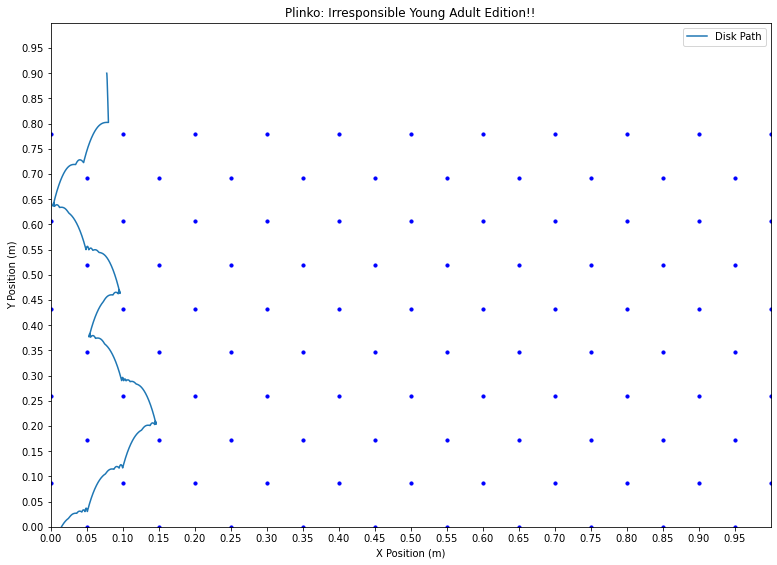

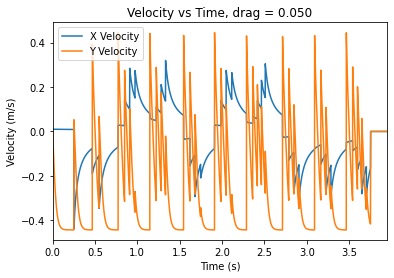

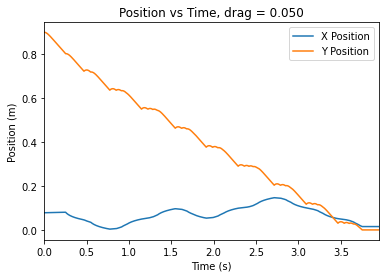

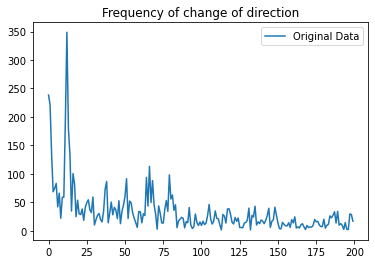

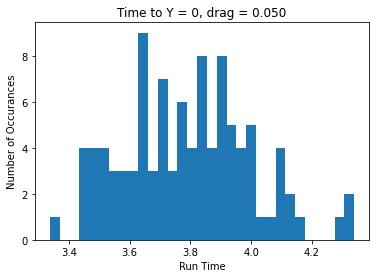

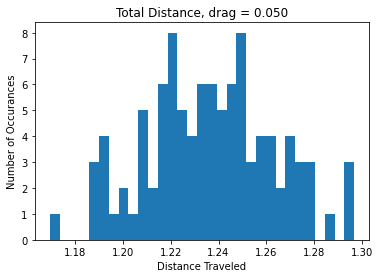

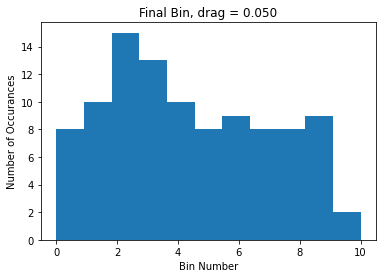

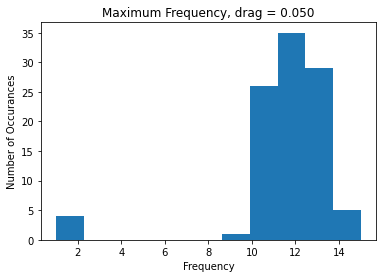

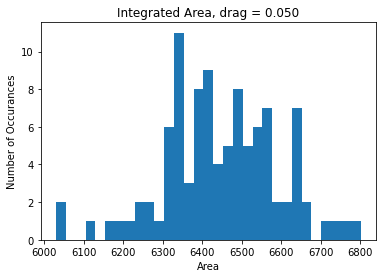

In [12]:
RunCode(0.05) 

### Drag Coefficient = 0.01

The frequency of maximum occurance 14
Integrated Area between 0 - 150Hz is:  11919.227
Landed in bin 5 do premarital handholding to person on left if you are comfortable
Initial conditions: 
x position 45.09395217212814 cm
y position 90.0 cm
x velocity 1.0 cm/s
y velocity 0.18 cm/s
drag coefficient 1.0 
initial simulation time 0 s


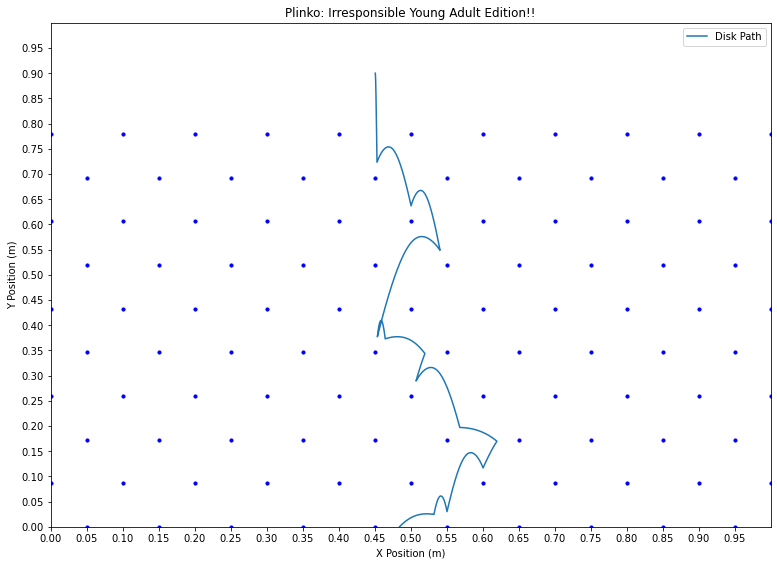

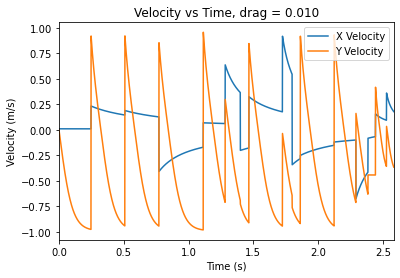

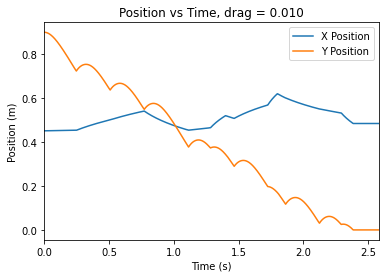

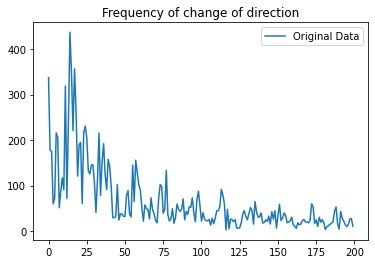

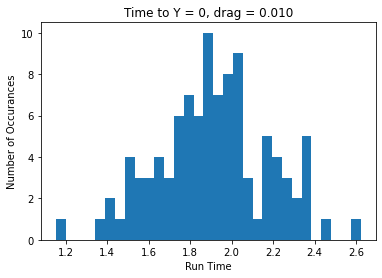

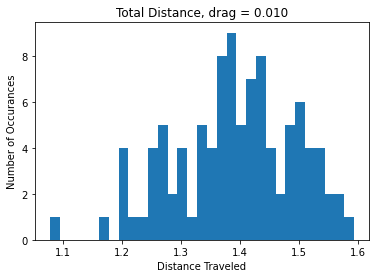

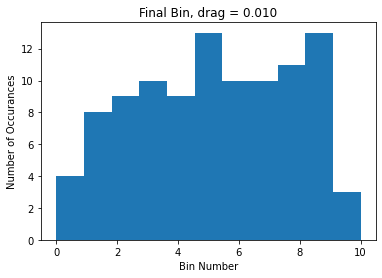

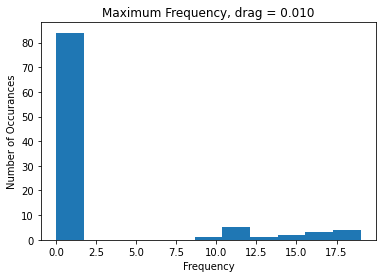

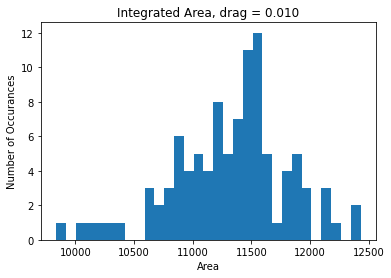

In [13]:
RunCode(0.01)

### Drag Coefficient = 0.005

The frequency of maximum occurance 13
Integrated Area between 0 - 150Hz is:  13982.765
Landed in bin 3 do body shots off the person to your right
Initial conditions: 
x position 35.84683893417425 cm
y position 90.0 cm
x velocity 1.17 cm/s
y velocity 0.0 cm/s
drag coefficient 0.5 
initial simulation time 0 s


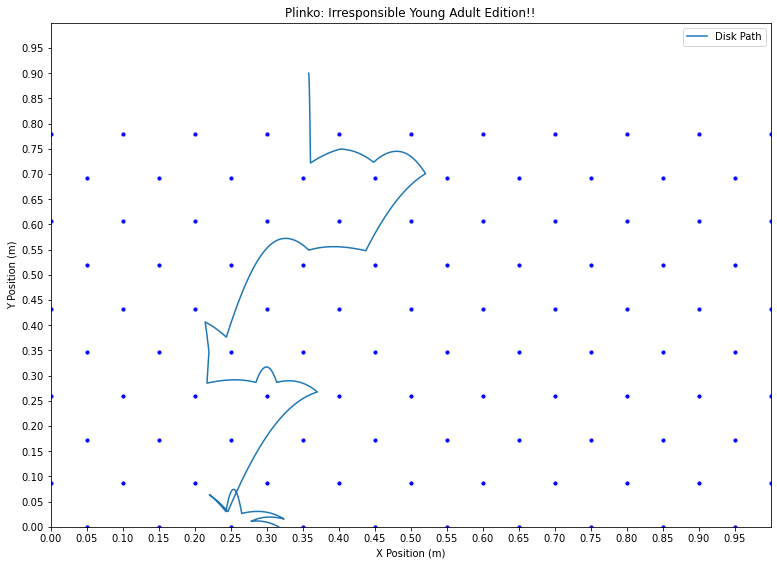

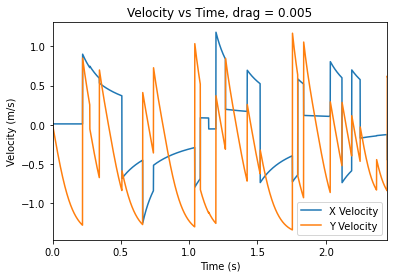

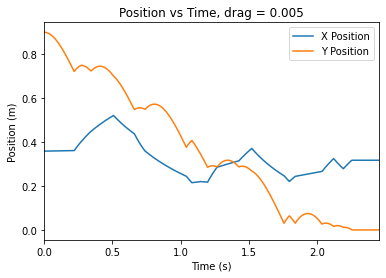

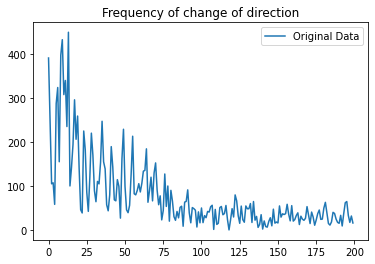

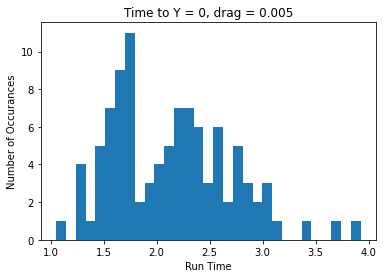

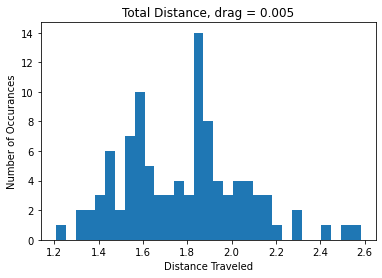

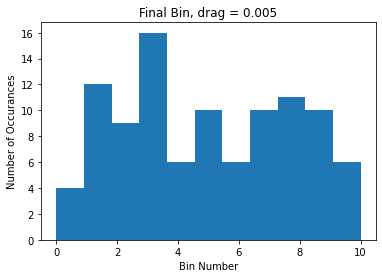

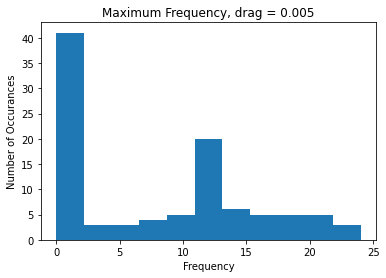

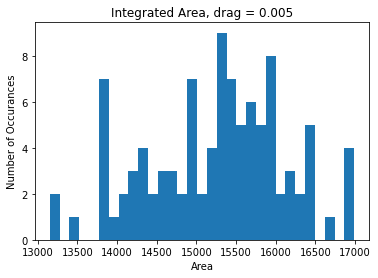

In [14]:
RunCode(0.005)

### Drag Coefficient = 0.001

The frequency of maximum occurance 3
Integrated Area between 0 - 150Hz is:  19047.279
Landed in bin 2 do your mating call
Initial conditions: 
x position 9.253787862472517 cm
y position 90.0 cm
x velocity 0.8500000000000001 cm/s
y velocity 0.0 cm/s
drag coefficient 0.1 
initial simulation time 0 s


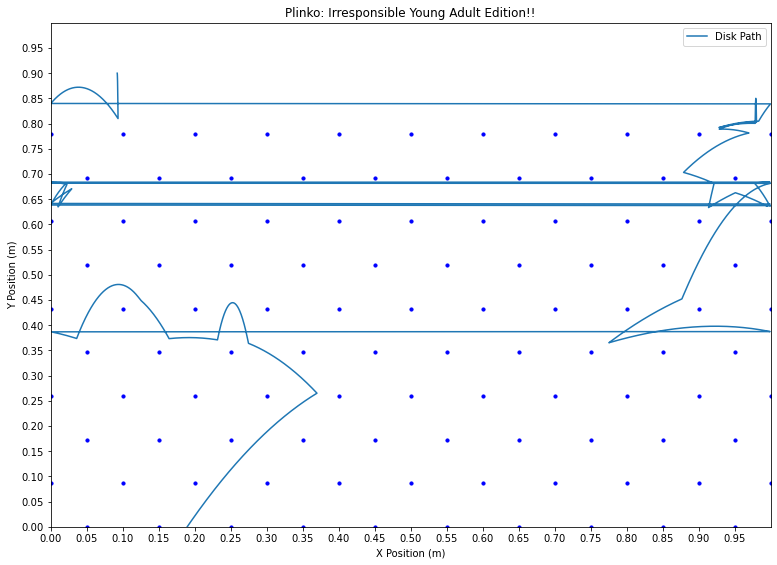

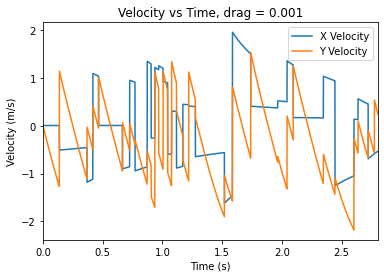

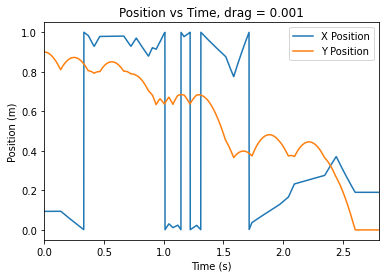

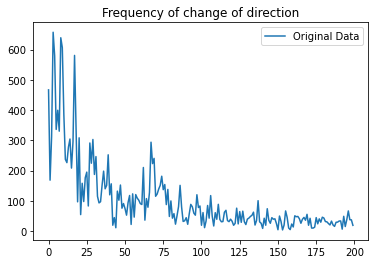

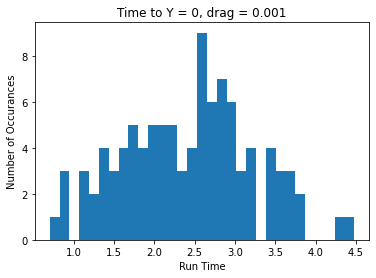

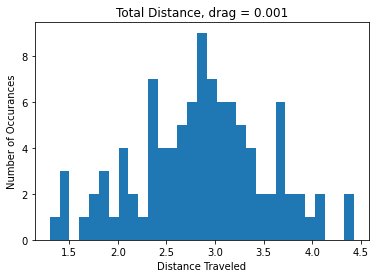

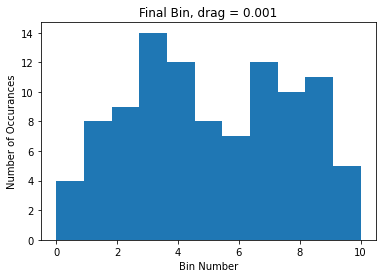

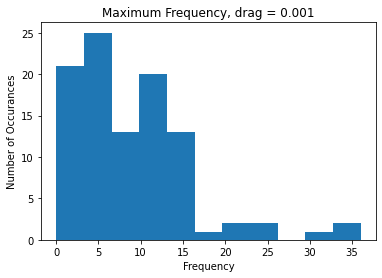

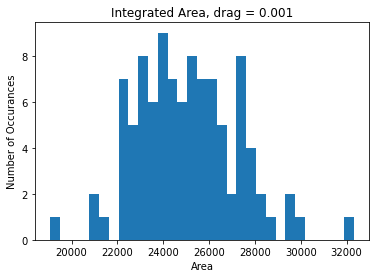

In [15]:
RunCode(0.001)